In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [6]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses=[]
        self.weights_hist=[]
        self.bias_hist=[]


    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0


        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            cost=-1/X.shape[0]*(np.dot(y.T,np.log2(y_predicted))+np.dot((1-y).T,np.log2(1-y_predicted)))
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.losses.append(cost)
            self.weights_hist.append(self.weights.tolist())
            self.bias_hist.append(self.bias.tolist())


    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

    def _draw_meshgrid(self,X,y):
        a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
        b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)

        XX, YY = np.meshgrid(a, b)

        input_array = np.array([XX.ravel(), YY.ravel()]).T

        return XX, YY, input_array
    
    def plot_decision_boundary(self, X, y):

        fig, ax = plt.subplots()
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        
        XX, YY, input_array = self._draw_meshgrid(X,y)
        labels = np.array(self.predict(input_array))

        

        ax.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='rainbow')
        plt.xlabel("Col1")
        plt.ylabel("Col2")
        plt.plot()
        
    

    


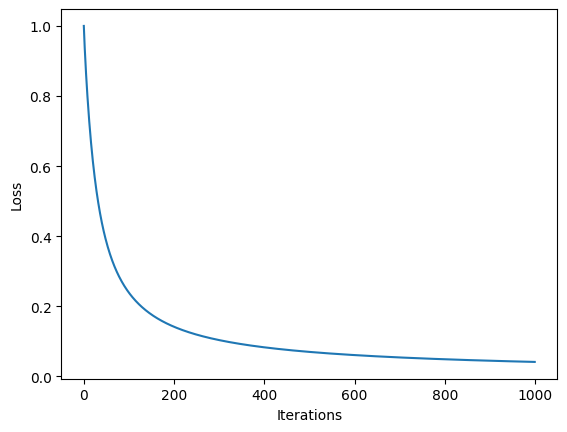

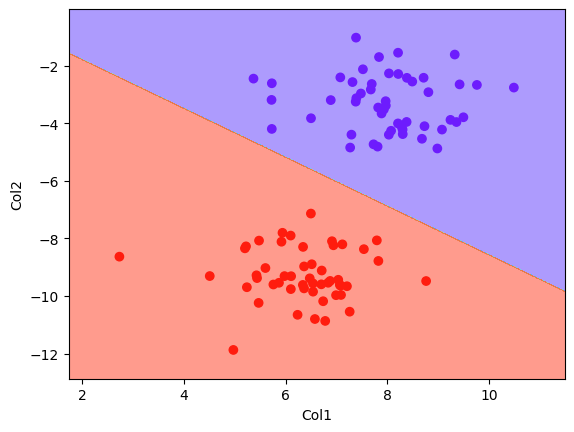

In [7]:
from sklearn.datasets import make_classification,make_blobs

X, y = make_blobs(n_features=2, centers=2,random_state=6)



model=LogisticRegression()

model.fit(X,y)

y_pred=model.predict(X)

model.plot_loss()

model.plot_decision_boundary(X,y)



In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y,y_pred)
confusion_matrix(y,y_pred)

array([[50,  0],
       [ 0, 50]])